### Imports

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from lime.lime_tabular import LimeTabularExplainer
import shap
import graphviz

In [327]:
df = pd.read_csv('final_df.csv')

In [328]:
def residuals_predictions_plot(model, X_train, y_train, X_test, y_test):
    visualizer = ResidualsPlot(model.best_estimator_, hist=False, qqplot=True)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

    visualizer = PredictionError(model.best_estimator_)
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()

### First sight

In [329]:
df.head()

Unnamed: 0  index  OSEBuildingID  NumberofBuildings  ENERGYSTARScore  \
0           0      0              1                1.0             60.0   
1           1      1              2                1.0             61.0   
2           2      2              3                1.0             43.0   
3           3      3              5                1.0             56.0   
4           4      4              8                1.0             75.0   

   log_NumberofFloors  log_PropertyGFAParking  log_SiteEUI(kBtu/sf)  \
0            2.484907                0.000000              4.403054   
1            2.397895                9.620063              4.551769   
2            3.713572               12.189527              4.564348   
3            2.302585                0.000000              4.707727   
4            2.890372               11.034890              4.743192   

   log_SteamUse(kBtu)  log_Electricity(kBtu)  ...  Neighborhood_LAKE UNION  \
0           14.510597              15.188220  ...                        0   
1            0.000000              14.991963  ...                        0   
2           16.886654              17.718022  ...                        0   
3           14.610513              14.833969  ...                        0   
4            0.000000              15.496079  ...                        0   

   Neighborhood_MAGNOLIA / QUEEN ANNE  Neighborhood_NORTH  \
0                                   0                   0   
1                                   0                   0   
2                                   0                   0   
3                                   0                   0   
4                                   0                   0   

   Neighborhood_NORTHEAST  Neighborhood_NORTHWEST  Neighborhood_North  \
0                       0                       0                   0   
1                       0                       0                   0   
2                       0                       0                   0   
3                       0                       0                   0   
4                       0                       0                   0   

   Neighborhood_Northwest  Neighborhood_SOUTHEAST  Neighborhood_SOUTHWEST  age  
0                       0                       0                       0   88  
1                       0                       0                       0   19  
2                       0                       0                       0   46  
3                       0                       0                       0   89  
4                       0                       0                       0   35  

[5 rows x 112 columns]

In [330]:
list(df.columns)

['Unnamed: 0',
 'index',
 'OSEBuildingID',
 'NumberofBuildings',
 'ENERGYSTARScore',
 'log_NumberofFloors',
 'log_PropertyGFAParking',
 'log_SiteEUI(kBtu/sf)',
 'log_SteamUse(kBtu)',
 'log_Electricity(kBtu)',
 'log_NaturalGas(kBtu)',
 'log_GHGEmissionsIntensity',
 'index.1',
 'UGFA_',
 'UGFA_Adult Education',
 'UGFA_Automobile Dealership',
 'UGFA_Bank Branch',
 'UGFA_Bar/Nightclub',
 'UGFA_College/University',
 'UGFA_Convenience Store without Gas Station',
 'UGFA_Courthouse',
 'UGFA_Data Center',
 'UGFA_Distribution Center',
 'UGFA_Enclosed Mall',
 'UGFA_Fast Food Restaurant',
 'UGFA_Financial Office',
 'UGFA_Fitness Center/Health Club/Gym',
 'UGFA_Food Sales',
 'UGFA_Food Service',
 'UGFA_Hospital (General Medical & Surgical)',
 'UGFA_Hotel',
 'UGFA_K-12 School',
 'UGFA_Laboratory',
 'UGFA_Lifestyle Center',
 'UGFA_Manufacturing/Industrial Plant',
 'UGFA_Medical Office',
 'UGFA_Movie Theater',
 'UGFA_Multifamily Housing',
 'UGFA_Museum',
 'UGFA_Non-Refrigerated Warehouse',
 'UGFA_Offi

In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 112 entries, Unnamed: 0 to age
dtypes: float64(68), int64(44)
memory usage: 1.2 MB


In [332]:
df.dropna(inplace=True)
df.replace({-np.inf:0}, inplace=True)

# Univariate analyses

In [333]:
variables = [
    'age', 'NumberofBuildings', 'log_NumberofFloors', 'ENERGYSTARScore',
    'log_PropertyGFAParking',
    'log_SiteEUI(kBtu/sf)',
    'log_SteamUse(kBtu)', 'log_Electricity(kBtu)', 'log_NaturalGas(kBtu)',
    'log_GHGEmissionsIntensity'
]

age
min 0
max 115
NumberofBuildings
min 0.0
max 9.0
log_NumberofFloors
min 0.0
max 4.59511985013459
ENERGYSTARScore
min 0.0
max 100.0
log_PropertyGFAParking
min 0.0
max 13.147266699501207
log_SiteEUI(kBtu/sf)
min -0.3566749610815897
max 6.726712932929131
log_SteamUse(kBtu)
min 0.0
max 18.720366404218424
log_Electricity(kBtu)
min 0.0
max 19.430580190778308
log_NaturalGas(kBtu)
min 0.0
max 18.744149066419617
log_GHGEmissionsIntensity
min -4.605170185988091
max 3.246880021277798


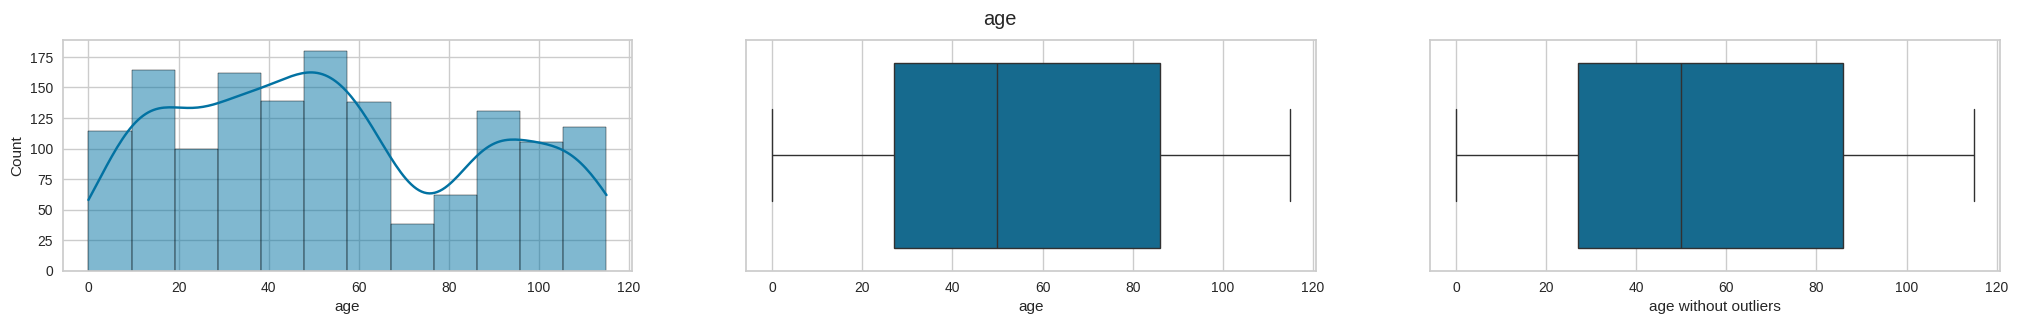

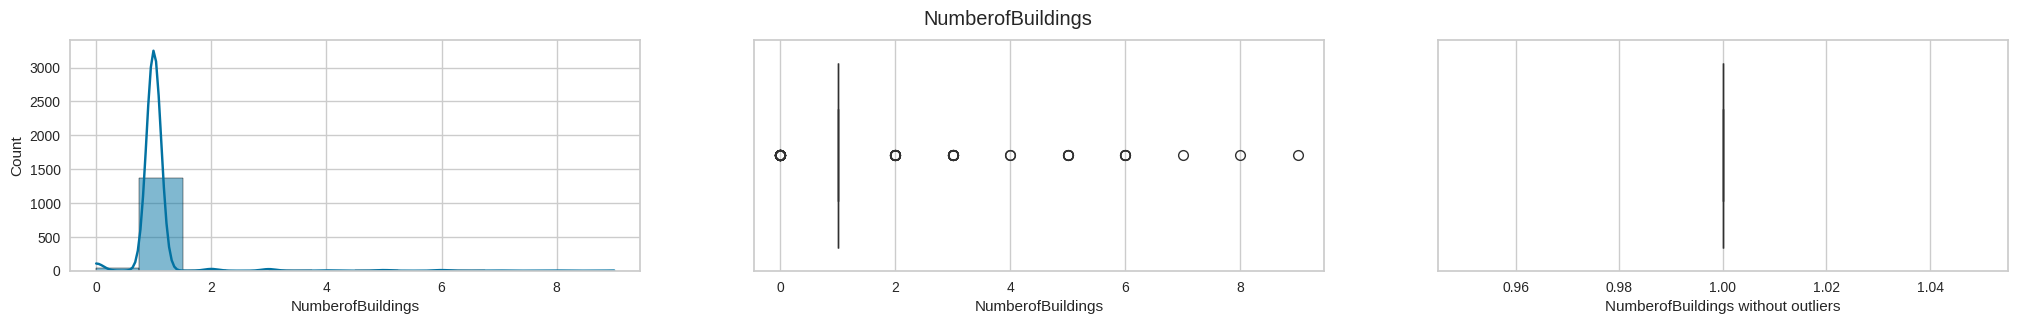

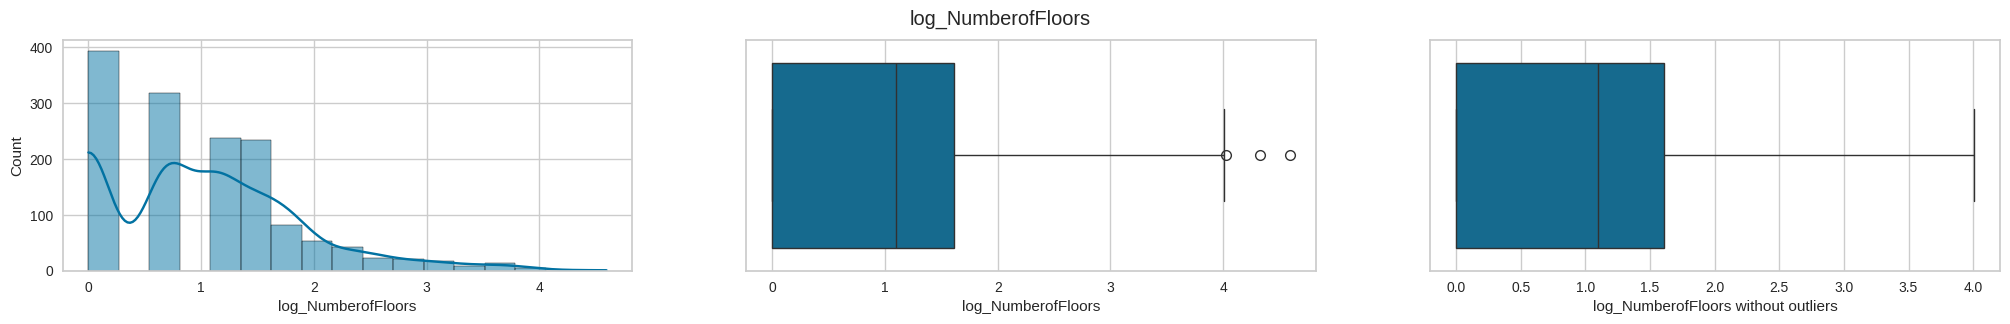

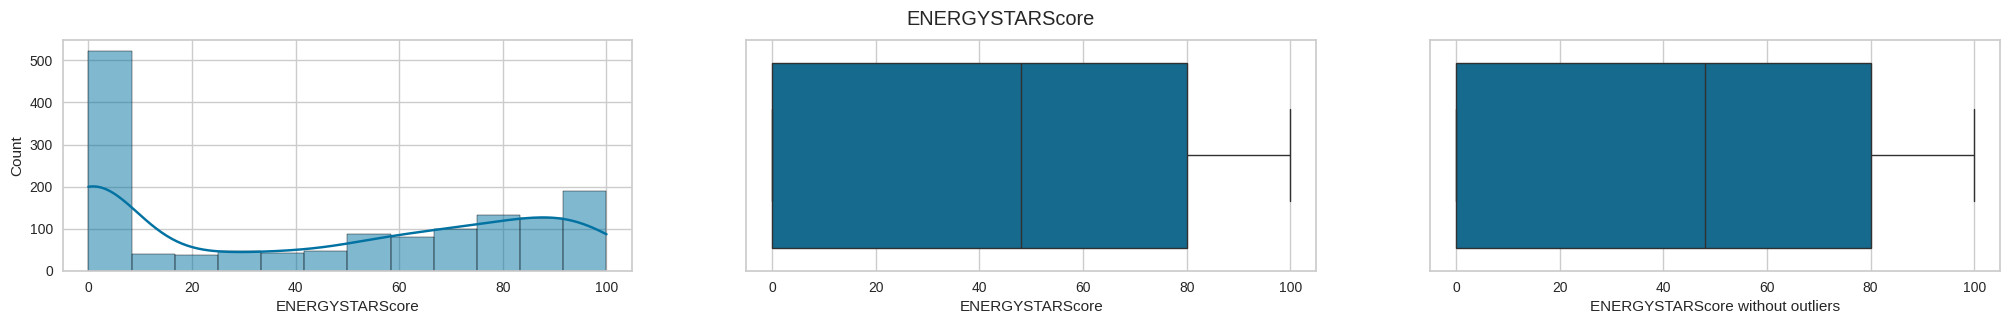

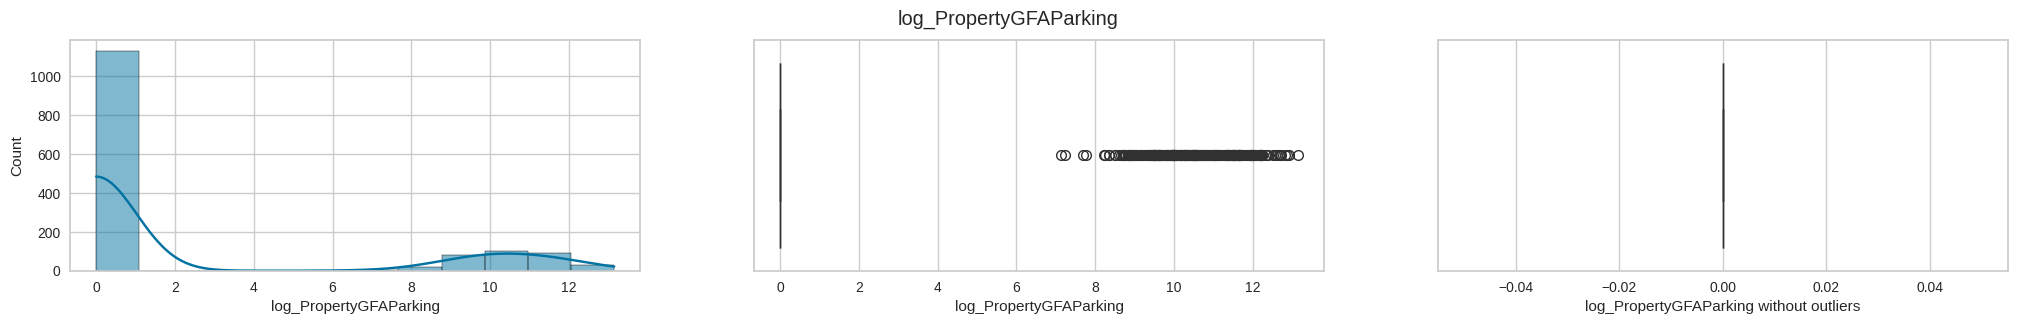

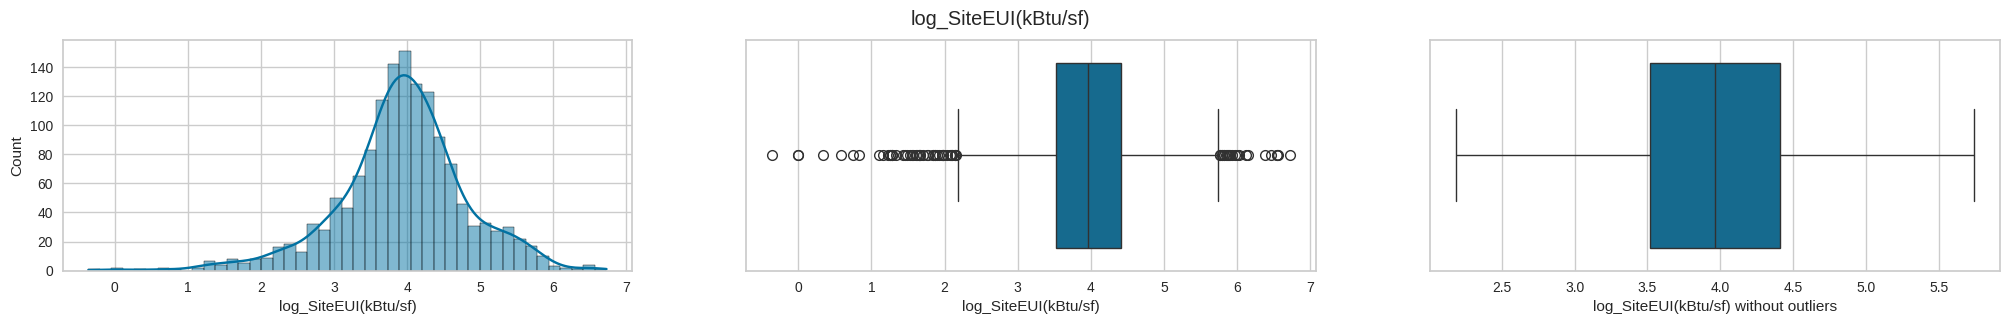

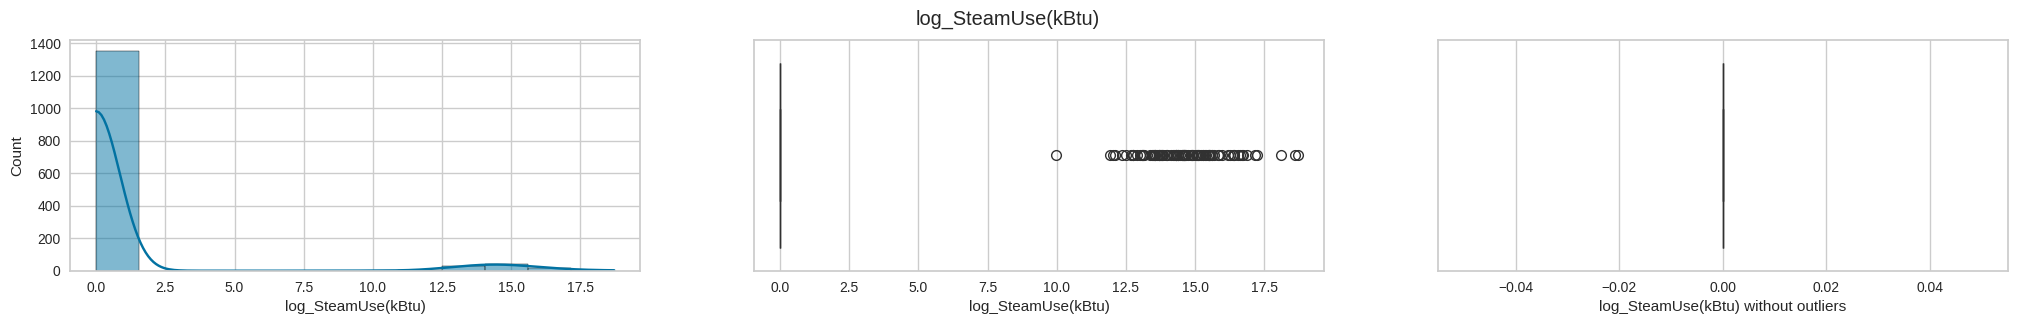

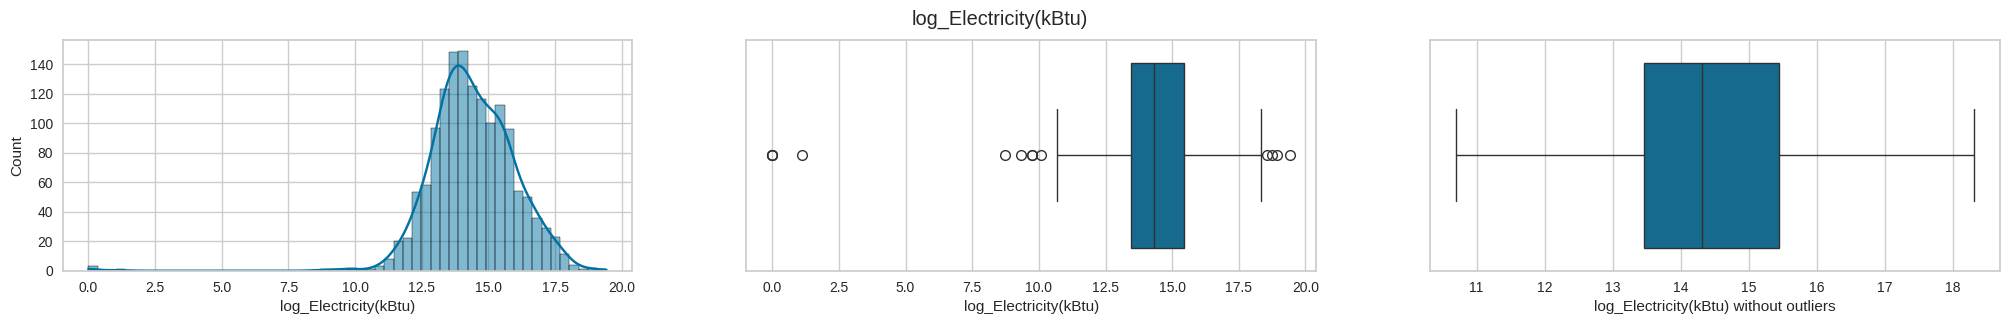

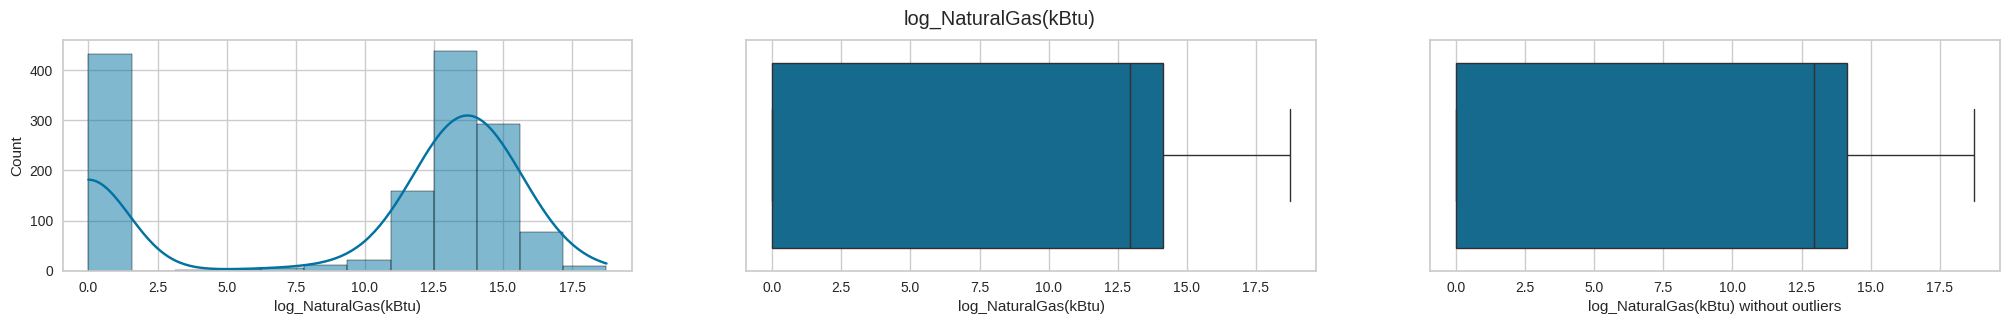

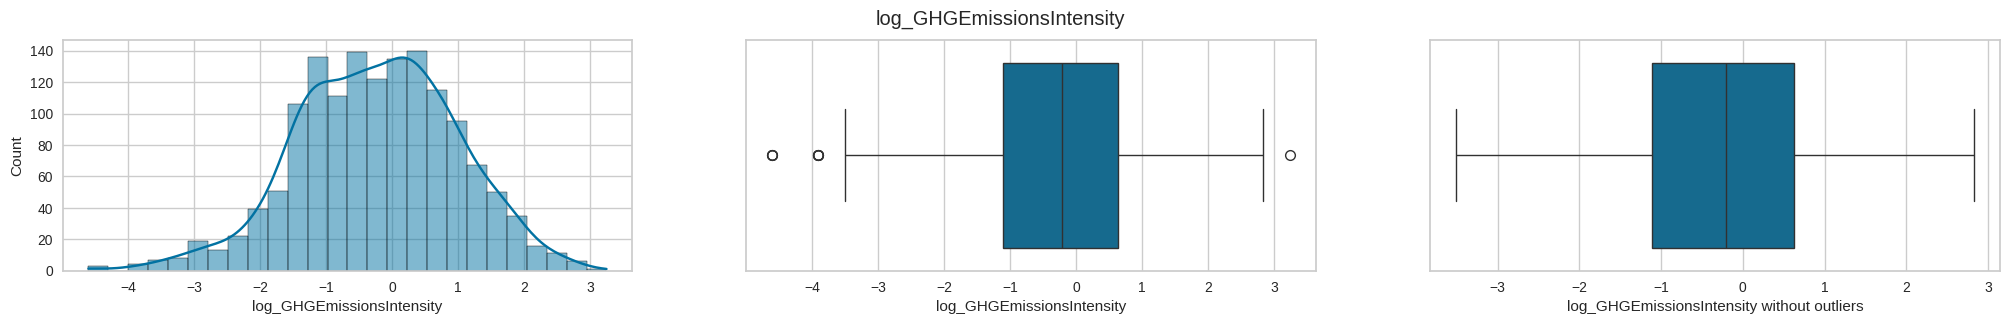

In [334]:
for variable in variables:

  print(variable)
  print('min', df[variable].min())
  print('max', df[variable].max())

  fig, axes = plt.subplots(1, 3, figsize=(25, 3))
  fig.suptitle(variable)

  sns.histplot(ax=axes[0], x=variable, data=df, kde=True)
  sns.boxplot(ax=axes[1], x=variable, data=df)
  sns.boxplot(ax=axes[2], x=variable, data=df, showfliers = False)
  plt.xlabel(f"{variable} without outliers")

# Pipeline

split with cross-validation : choose K : méthode de coude
evaluation with metrics : plusieurs familles : indicateurs d'erreur, indicateurs de performance, temps de traitement
indicateurs à la fois sur le jeu de test et le jeu d'entraînement


optimisation d'hyperparamètres : au cas par cas

### Data split : train set and test set

In [335]:
def init_variables(df, y=0):

    X = df.drop(['log_GHGEmissionsIntensity', 'log_SiteEUI(kBtu/sf)', 'OSEBuildingID', 'index', 'index.1'] ,axis=1)

    y_GHG = df['log_GHGEmissionsIntensity']
    y_E = df['log_SiteEUI(kBtu/sf)']

    if y == 0:
        X_train, X_test, y_train, y_test = train_test_split(X, y_GHG, test_size=0.2, random_state=42)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y_E, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test

### Cross-validation and evaluation

In [336]:
scoring = {
    'neg_root_mean_squared_error': 'neg_root_mean_squared_error',
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'r2': 'r2'
}

refit = 'r2'

result_df = pd.DataFrame(columns=[
    'model_name', 'fit_time (s)', 'best_params', 'refit', 'train_rmse', 'train_mae', 'train_r2', 'test_rmse', 'test_mae', 'test_r2'
])

In [337]:
def process_cv(model_name, pipeline, param_grid, refit, X_train, X_test, y_train, y_test):
    
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,  cv=5, n_jobs=-1, verbose=1, scoring=scoring, refit=refit)
    best_model = grid_search.fit(X_train, y_train)

    y_pred_test = best_model.predict(X_test)

    train_rmse = - best_model.cv_results_['mean_test_neg_root_mean_squared_error'][best_model.best_index_]
    train_mae = - best_model.cv_results_['mean_test_neg_mean_absolute_error'][best_model.best_index_]
    train_r2 = best_model.cv_results_['mean_test_r2'][best_model.best_index_]

    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    
    fit_time = best_model.cv_results_['mean_fit_time'][best_model.best_index_]
    best_params = best_model.best_params_

    new_row = [
        model_name,
        round(grid_search.refit_time_, 2),
        grid_search.best_params_,
        refit,        
        round(train_rmse, 2),
        round(train_mae, 2),
        round(train_r2, 2),
        round(test_rmse, 2),
        round(test_mae, 2),
        round(test_r2, 2)
    ]

    result_df.loc[len(result_df)] = new_row

    return grid_search

# Process

### Dummy Regressor

In [338]:
X_train, X_test, y_train, y_test = init_variables(df, 0)

pipeline_dummy = Pipeline([
    ('dummy_regressor', DummyRegressor())
])

param_grid_dummy = {}

res0 = process_cv('dummy_regressor', pipeline_dummy, param_grid_dummy, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


In [339]:
result_df

model_name  fit_time (s) best_params refit  train_rmse  train_mae  \
0  dummy_regressor           0.0          {}    r2        1.21       0.98   

   train_r2  test_rmse  test_mae  test_r2  
0     -0.01       1.22      0.96    -0.01

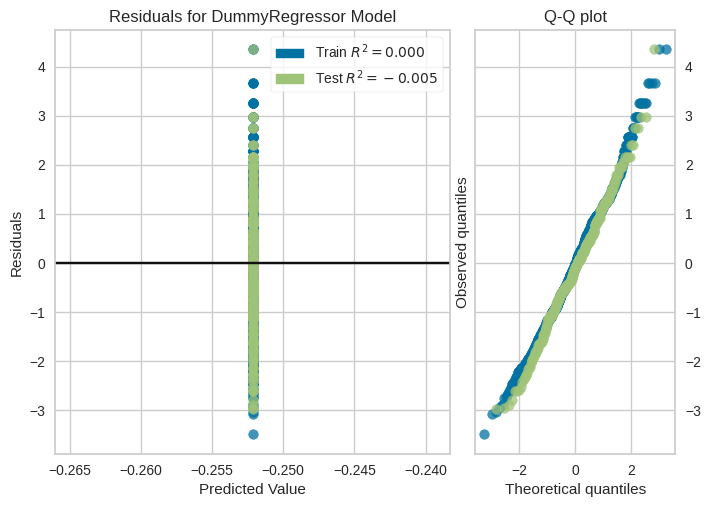

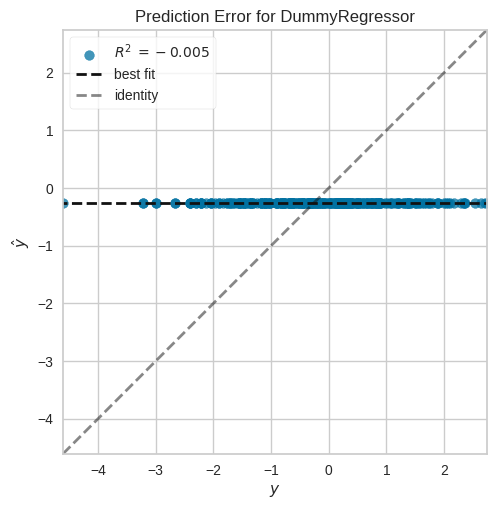

In [340]:
residuals_predictions_plot(res0, X_train, y_train, X_test, y_test)

### Linear Regression

In [341]:
pipeline_LR = Pipeline([
    ('scaler', StandardScaler()),  # Standardisation des données
    ('regressor', LinearRegression())  # Modèle de régression linéaire
])

param_grid_LR = {
    'scaler': [StandardScaler(), None]
}

In [342]:
X_train, X_test, y_train, y_test = init_variables(df, 0)

In [343]:
res1 = process_cv('linear_regression', pipeline_LR, param_grid_LR, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [344]:
result_df

model_name  fit_time (s)       best_params refit  train_rmse  \
0    dummy_regressor          0.00                {}    r2        1.21   
1  linear_regression          0.01  {'scaler': None}    r2        0.76   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66

X does not have valid feature names, but LinearRegression was fitted with feature names


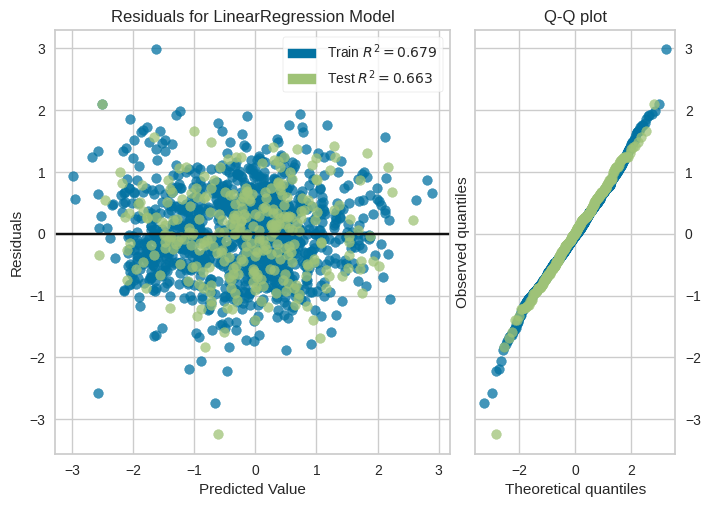

X does not have valid feature names, but LinearRegression was fitted with feature names


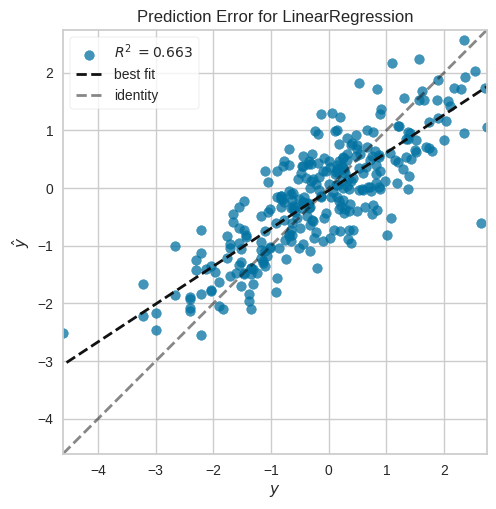

In [345]:
residuals_predictions_plot(res1, X_train, y_train, X_test, y_test)

### Transformation : GFA -> proportion

In [346]:
df_init = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [347]:
df_bis = df.copy()

for i, row in df_bis.iterrows():
    log_gfa_total = np.log(df_init.loc[df_init['OSEBuildingID'] == row['OSEBuildingID'], 'PropertyGFATotal'].values[0])

    for variable in df.columns:
        if variable == 'log_PropertyGFAParking' or 'UGFA' in variable:
            df_bis.loc[i, variable] = row[variable] - log_gfa_total

In [348]:
X_train_bis, X_test_bis, y_train_bis, y_test_bis = init_variables(df_bis, 0)

In [349]:
res2 = process_cv('linear_regression_GFA_proportions', pipeline_LR, param_grid_LR, refit, X_train_bis, X_test_bis, y_train_bis, y_test_bis)
result_df

Fitting 5 folds for each of 2 candidates, totalling 10 fits


model_name  fit_time (s)       best_params refit  \
0                    dummy_regressor          0.00                {}    r2   
1                  linear_regression          0.01  {'scaler': None}    r2   
2  linear_regression_GFA_proportions          0.01  {'scaler': None}    r2   

   train_rmse  train_mae  train_r2  test_rmse  test_mae  test_r2  
0        1.21       0.98     -0.01       1.22      0.96    -0.01  
1        0.76       0.60      0.60       0.70      0.56     0.66  
2        0.73       0.57      0.63       0.69      0.51     0.68

### Variables grouping

In [350]:
list(df.columns)

['Unnamed: 0',
 'index',
 'OSEBuildingID',
 'NumberofBuildings',
 'ENERGYSTARScore',
 'log_NumberofFloors',
 'log_PropertyGFAParking',
 'log_SiteEUI(kBtu/sf)',
 'log_SteamUse(kBtu)',
 'log_Electricity(kBtu)',
 'log_NaturalGas(kBtu)',
 'log_GHGEmissionsIntensity',
 'index.1',
 'UGFA_',
 'UGFA_Adult Education',
 'UGFA_Automobile Dealership',
 'UGFA_Bank Branch',
 'UGFA_Bar/Nightclub',
 'UGFA_College/University',
 'UGFA_Convenience Store without Gas Station',
 'UGFA_Courthouse',
 'UGFA_Data Center',
 'UGFA_Distribution Center',
 'UGFA_Enclosed Mall',
 'UGFA_Fast Food Restaurant',
 'UGFA_Financial Office',
 'UGFA_Fitness Center/Health Club/Gym',
 'UGFA_Food Sales',
 'UGFA_Food Service',
 'UGFA_Hospital (General Medical & Surgical)',
 'UGFA_Hotel',
 'UGFA_K-12 School',
 'UGFA_Laboratory',
 'UGFA_Lifestyle Center',
 'UGFA_Manufacturing/Industrial Plant',
 'UGFA_Medical Office',
 'UGFA_Movie Theater',
 'UGFA_Multifamily Housing',
 'UGFA_Museum',
 'UGFA_Non-Refrigerated Warehouse',
 'UGFA_Offi

In [351]:
group_mapping = {
    "UGFA_Education" : [
        "UGFA_Adult Education",
        "UGFA_College/University",
        "UGFA_Vocational School",
        "UGFA_Pre-school/Daycare",
        "UGFA_K-12 School",
        "UGFA_Other - Education"
    ],

    "UGFA_Services" : [
        "UGFA_Automobile Dealership",
        "UGFA_Bank Branch",
        "UGFA_Bar/Nightclub",
        "UGFA_Data Center",
        "UGFA_Distribution Center",
        "UGFA_Financial Office",
        "UGFA_Fitness Center/Health Club/Gym",
        "UGFA_Laboratory",
        "UGFA_Lifestyle Center",
        "UGFA_Manufacturing/Industrial Plant",
        "UGFA_Medical Office",
        "UGFA_Movie Theater",
        "UGFA_Museum",
        "UGFA_Non-Refrigerated Warehouse",
        "UGFA_Office",
        "UGFA_Other",
        "UGFA_Other - Entertainment/Public Assembly",
        "UGFA_Other - Services",
        "UGFA_Other - Technology/Science",
        "UGFA_Other - Utility",
        "UGFA_Personal Services (Health/Beauty, Dry Cleaning, etc)",
        "UGFA_Refrigerated Warehouse",
        "UGFA_Repair Services (Vehicle, Shoe, Locksmith, etc)",
        "UGFA_Self-Storage Facility",
        "UGFA_Wholesale Club/Supercenter"
    ],

    "UGFA_Residential" : [
        "UGFA_Hotel",
        "UGFA_Multifamily Housing",
        "UGFA_Residence Hall/Dormitory",
        "UGFA_Senior Care Community",
        "UGFA_Other - Lodging/Residential"
    ],

    "UGFA_Health" : [
        "UGFA_Hospital (General Medical & Surgical)",
        "UGFA_Other/Specialty Hospital",
        "UGFA_Urgent Care/Clinic/Other Outpatient"
    ],

    "UGFA_Assemblies" : [
        "UGFA_Worship Facility",
        "UGFA_Social/Meeting Hall",
        "UGFA_Performing Arts"
    ],

    "UGFA_Mall" : [
        "UGFA_Enclosed Mall",
        "UGFA_Strip Mall",
        "UGFA_Other - Mall"
    ],

    "UGFA_Stores" : [
        "UGFA_Retail Store",
        "UGFA_Supermarket/Grocery Store",
        "UGFA_Convenience Store without Gas Station",
        "UGFA_Food Sales",
        "UGFA_Wholesale Club/Supercenter"
    ],

    "UGFA_Restaurants" : [
        "UGFA_Restaurant",
        "UGFA_Fast Food Restaurant",
        "UGFA_Food Service",
        "UGFA_Other - Restaurant/Bar"
    ],

    "UGFA_Administrations" : [
        "UGFA_Courthouse",
        "UGFA_Other - Public Services",
        "UGFA_Parking",
        "UGFA_Other - Recreation",
        "UGFA_Swimming Pool",
    ]
}

In [352]:
cols_to_aggregate = [col for group in group_mapping.values() for col in group]

grouped_df = pd.DataFrame(index=df.index)

other_columns = [col for col in df.columns if col not in cols_to_aggregate if col in df.columns]
grouped_df[other_columns] = df[other_columns]

for group, columns in group_mapping.items():
    relevant_columns = [col for col in columns if col in df.columns]
    grouped_df[group] = df[relevant_columns].sum(axis=1)

In [353]:
grouped_df.columns

Index(['Unnamed: 0', 'index', 'OSEBuildingID', 'NumberofBuildings',
       'ENERGYSTARScore', 'log_NumberofFloors', 'log_PropertyGFAParking',
       'log_SiteEUI(kBtu/sf)', 'log_SteamUse(kBtu)', 'log_Electricity(kBtu)',
       'log_NaturalGas(kBtu)', 'log_GHGEmissionsIntensity', 'index.1', 'UGFA_',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Community',
       'Pr

In [354]:
X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped = init_variables(grouped_df, 0)
res3 = process_cv('linear_regression_grouped_df', pipeline_LR, param_grid_LR, refit, X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [355]:
result_df

model_name  fit_time (s)       best_params refit  \
0                    dummy_regressor          0.00                {}    r2   
1                  linear_regression          0.01  {'scaler': None}    r2   
2  linear_regression_GFA_proportions          0.01  {'scaler': None}    r2   
3       linear_regression_grouped_df          0.01  {'scaler': None}    r2   

   train_rmse  train_mae  train_r2  test_rmse  test_mae  test_r2  
0        1.21       0.98     -0.01       1.22      0.96    -0.01  
1        0.76       0.60      0.60       0.70      0.56     0.66  
2        0.73       0.57      0.63       0.69      0.51     0.68  
3        0.74       0.58      0.62       0.68      0.53     0.68

### Linear Regression : Ridge, Lasso, ElasticNet

In [356]:
pipeline_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid_ridge = {
    'ridge__alpha': [0.1, 1, 10, 20, 30, 50, 80, 100, 200, 400, 700, 1000],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag'],
    'scaler': [StandardScaler(), None]
}

res4 = process_cv('ridge', pipeline_ridge, param_grid_ridge, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/omar-oc/anaconda3/envs/env_OC_P3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warni

In [357]:
result_df

model_name  fit_time (s)  \
0                    dummy_regressor          0.00   
1                  linear_regression          0.01   
2  linear_regression_GFA_proportions          0.01   
3       linear_regression_grouped_df          0.01   
4                              ridge          0.01   

                                         best_params refit  train_rmse  \
0                                                 {}    r2        1.21   
1                                   {'scaler': None}    r2        0.76   
2                                   {'scaler': None}    r2        0.73   
3                                   {'scaler': None}    r2        0.74   
4  {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66  
2       0.57      0.63       0.69      0.51     0.68  
3       0.58      0.62       0.68      0.53     0.68  
4       0.59      0.61       0.71      0.56     0.66

X does not have valid feature names, but StandardScaler was fitted with feature names


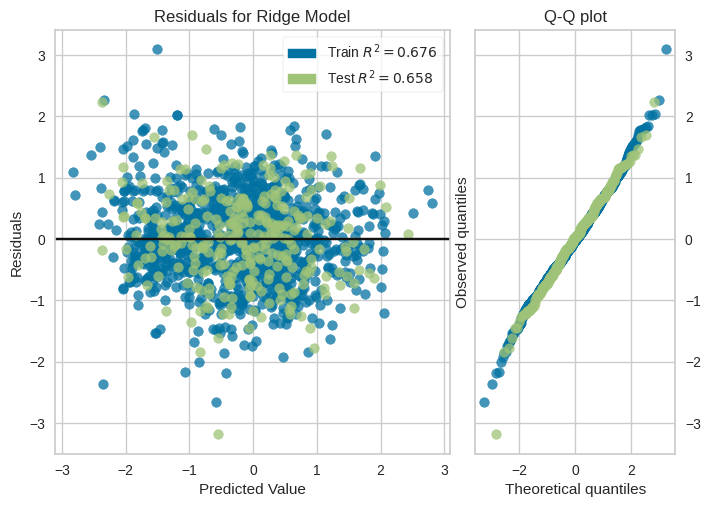

X does not have valid feature names, but StandardScaler was fitted with feature names


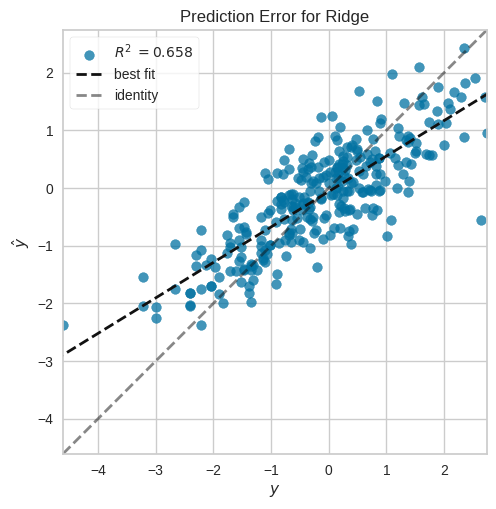

In [358]:
residuals_predictions_plot(res4, X_train, y_train, X_test, y_test)

In [359]:
pipeline_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

param_grid_lasso = {
    'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 20, 30, 50, 80, 100, 200, 400, 700, 1000],
    'lasso__max_iter': [1000, 5000, 10000],
    'scaler': [StandardScaler(), None]
}

res7 = process_cv('lasso', pipeline_lasso, param_grid_lasso, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


In [360]:
result_df

model_name  fit_time (s)  \
0                    dummy_regressor          0.00   
1                  linear_regression          0.01   
2  linear_regression_GFA_proportions          0.01   
3       linear_regression_grouped_df          0.01   
4                              ridge          0.01   
5                              lasso          0.01   

                                         best_params refit  train_rmse  \
0                                                 {}    r2        1.21   
1                                   {'scaler': None}    r2        0.76   
2                                   {'scaler': None}    r2        0.73   
3                                   {'scaler': None}    r2        0.74   
4  {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5  {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66  
2       0.57      0.63       0.69      0.51     0.68  
3       0.58      0.62       0.68      0.53     0.68  
4       0.59      0.61       0.71      0.56     0.66  
5       0.59      0.62       0.70      0.55     0.67

X does not have valid feature names, but StandardScaler was fitted with feature names


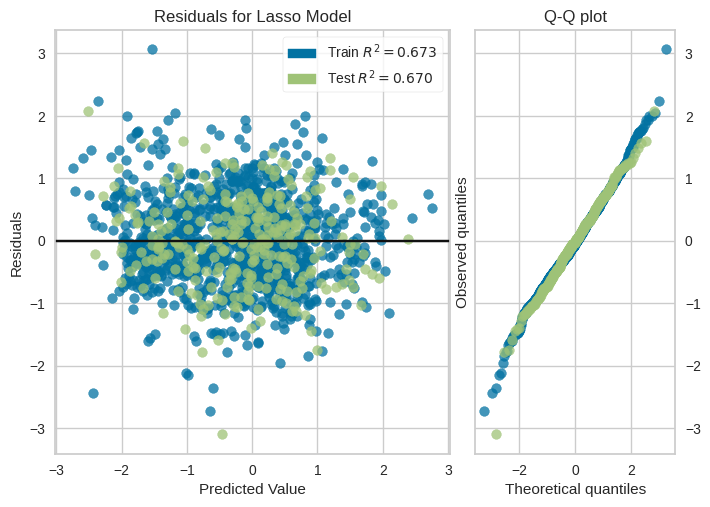

X does not have valid feature names, but StandardScaler was fitted with feature names


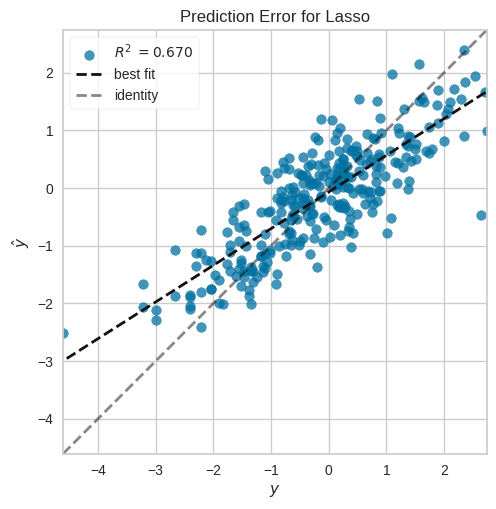

In [361]:
residuals_predictions_plot(res7, X_train, y_train, X_test, y_test)

In [362]:
pipeline_elastic_net = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

param_grid_elastic_net = {
    'elasticnet__alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'elasticnet__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0],
    'elasticnet__max_iter': [1000, 5000, 10000],
    'scaler': [StandardScaler(), None]
}

res10 = process_cv('elastic_net', pipeline_elastic_net, param_grid_elastic_net, refit, X_train, X_test, y_train, y_test)
# res11 = process_cv('elastic_net_proportions', pipeline_elastic_net, param_grid_elastic_net, refit, X_train_grouped, X_test_grouped, y_train_grouped, y_test_grouped)
# res12 = process_cv('elastic_net_grouped', pipeline_elastic_net, param_grid_elastic_net, refit, X_train_bis, X_test_bis, y_train_bis, y_test_bis)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [363]:
result_df

model_name  fit_time (s)  \
0                    dummy_regressor          0.00   
1                  linear_regression          0.01   
2  linear_regression_GFA_proportions          0.01   
3       linear_regression_grouped_df          0.01   
4                              ridge          0.01   
5                              lasso          0.01   
6                        elastic_net          0.01   

                                         best_params refit  train_rmse  \
0                                                 {}    r2        1.21   
1                                   {'scaler': None}    r2        0.76   
2                                   {'scaler': None}    r2        0.73   
3                                   {'scaler': None}    r2        0.74   
4  {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5  {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   
6  {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...    r2        0.75   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66  
2       0.57      0.63       0.69      0.51     0.68  
3       0.58      0.62       0.68      0.53     0.68  
4       0.59      0.61       0.71      0.56     0.66  
5       0.59      0.62       0.70      0.55     0.67  
6       0.59      0.62       0.70      0.55     0.67

X does not have valid feature names, but StandardScaler was fitted with feature names


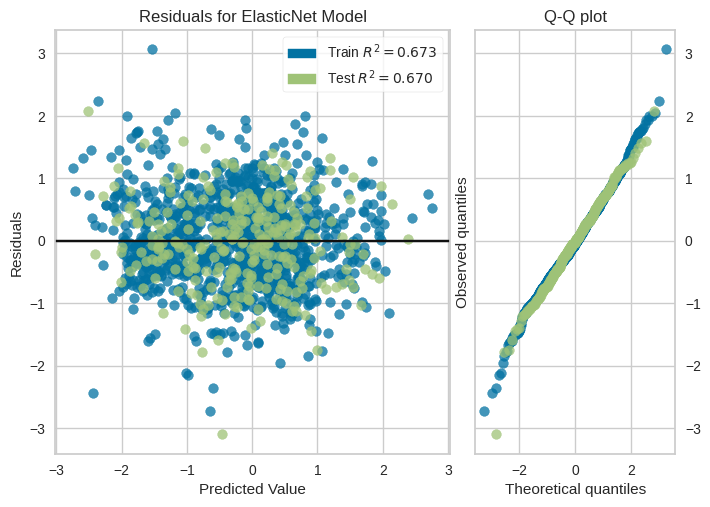

X does not have valid feature names, but StandardScaler was fitted with feature names


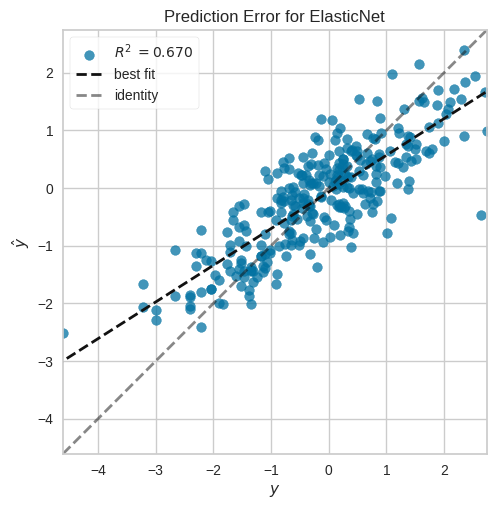

In [364]:
residuals_predictions_plot(res10, X_train, y_train, X_test, y_test)

# Desision Regression Trees

In [365]:
pipeline_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor())
])

param_grid_tree = {
    'scaler': [StandardScaler(), None]
    #'criterion': ['mse', 'friedman_mse', 'mae'],
    #'splitter': ['best', 'random'],
    #'max_depth': [None, 10, 20, 30, 40, 50],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'max_features': [None, 'auto', 'sqrt', 'log2']
}

In [366]:
res13 = process_cv('regression_tree', pipeline_tree, param_grid_tree, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [367]:
result_df

model_name  fit_time (s)  \
0                    dummy_regressor          0.00   
1                  linear_regression          0.01   
2  linear_regression_GFA_proportions          0.01   
3       linear_regression_grouped_df          0.01   
4                              ridge          0.01   
5                              lasso          0.01   
6                        elastic_net          0.01   
7                    regression_tree          0.01   

                                         best_params refit  train_rmse  \
0                                                 {}    r2        1.21   
1                                   {'scaler': None}    r2        0.76   
2                                   {'scaler': None}    r2        0.73   
3                                   {'scaler': None}    r2        0.74   
4  {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5  {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   
6  {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...    r2        0.75   
7                                   {'scaler': None}    r2        0.58   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66  
2       0.57      0.63       0.69      0.51     0.68  
3       0.58      0.62       0.68      0.53     0.68  
4       0.59      0.61       0.71      0.56     0.66  
5       0.59      0.62       0.70      0.55     0.67  
6       0.59      0.62       0.70      0.55     0.67  
7       0.43      0.77       0.59      0.45     0.76

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


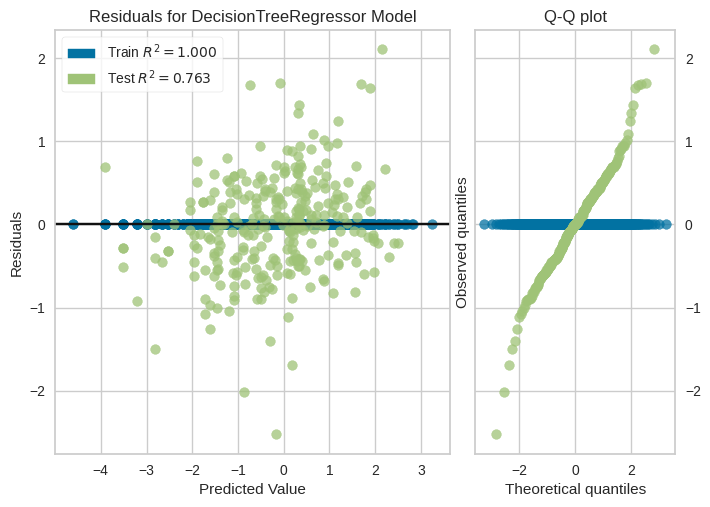

X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


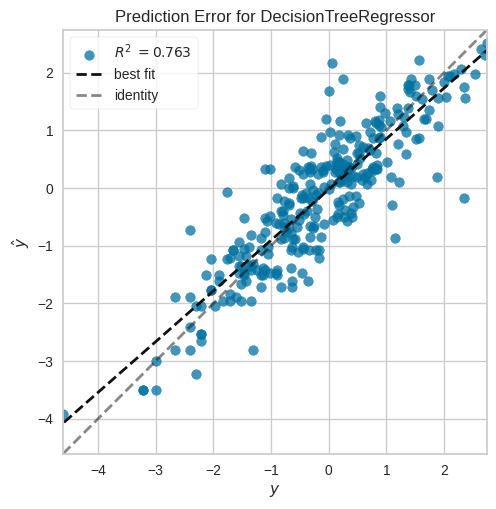

In [368]:
residuals_predictions_plot(res13, X_train, y_train, X_test, y_test)

### Random Forest

In [369]:
pipeline_random_forest = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', RandomForestRegressor())
])

param_grid_random_forest = {
    'scaler': [StandardScaler(), None]
}

In [370]:
res15 = process_cv('random_forest', pipeline_random_forest, param_grid_random_forest, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [371]:
result_df

model_name  fit_time (s)  \
0                    dummy_regressor          0.00   
1                  linear_regression          0.01   
2  linear_regression_GFA_proportions          0.01   
3       linear_regression_grouped_df          0.01   
4                              ridge          0.01   
5                              lasso          0.01   
6                        elastic_net          0.01   
7                    regression_tree          0.01   
8                      random_forest          0.68   

                                         best_params refit  train_rmse  \
0                                                 {}    r2        1.21   
1                                   {'scaler': None}    r2        0.76   
2                                   {'scaler': None}    r2        0.73   
3                                   {'scaler': None}    r2        0.74   
4  {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5  {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   
6  {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...    r2        0.75   
7                                   {'scaler': None}    r2        0.58   
8                       {'scaler': StandardScaler()}    r2        0.46   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66  
2       0.57      0.63       0.69      0.51     0.68  
3       0.58      0.62       0.68      0.53     0.68  
4       0.59      0.61       0.71      0.56     0.66  
5       0.59      0.62       0.70      0.55     0.67  
6       0.59      0.62       0.70      0.55     0.67  
7       0.43      0.77       0.59      0.45     0.76  
8       0.33      0.85       0.42      0.31     0.88

X does not have valid feature names, but StandardScaler was fitted with feature names


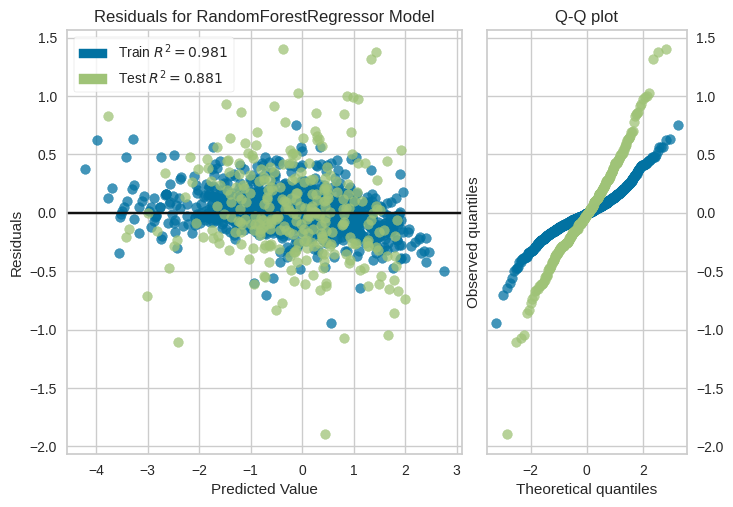

X does not have valid feature names, but StandardScaler was fitted with feature names


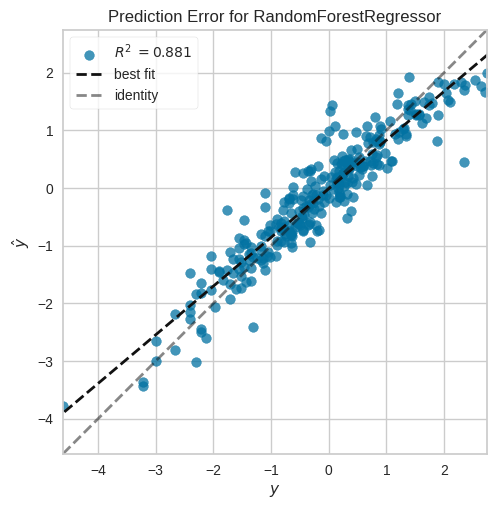

In [372]:
residuals_predictions_plot(res15, X_train, y_train, X_test, y_test)

In [373]:
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

param_grid_xgb = {
    'scaler': [StandardScaler(), None]
}

res16 = process_cv('xgb', pipeline_xgb, param_grid_xgb, refit, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [374]:
result_df

model_name  fit_time (s)  \
0                    dummy_regressor          0.00   
1                  linear_regression          0.01   
2  linear_regression_GFA_proportions          0.01   
3       linear_regression_grouped_df          0.01   
4                              ridge          0.01   
5                              lasso          0.01   
6                        elastic_net          0.01   
7                    regression_tree          0.01   
8                      random_forest          0.68   
9                                xgb          0.39   

                                         best_params refit  train_rmse  \
0                                                 {}    r2        1.21   
1                                   {'scaler': None}    r2        0.76   
2                                   {'scaler': None}    r2        0.73   
3                                   {'scaler': None}    r2        0.74   
4  {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5  {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   
6  {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...    r2        0.75   
7                                   {'scaler': None}    r2        0.58   
8                       {'scaler': StandardScaler()}    r2        0.46   
9                       {'scaler': StandardScaler()}    r2        0.46   

   train_mae  train_r2  test_rmse  test_mae  test_r2  
0       0.98     -0.01       1.22      0.96    -0.01  
1       0.60      0.60       0.70      0.56     0.66  
2       0.57      0.63       0.69      0.51     0.68  
3       0.58      0.62       0.68      0.53     0.68  
4       0.59      0.61       0.71      0.56     0.66  
5       0.59      0.62       0.70      0.55     0.67  
6       0.59      0.62       0.70      0.55     0.67  
7       0.43      0.77       0.59      0.45     0.76  
8       0.33      0.85       0.42      0.31     0.88  
9       0.32      0.85       0.41      0.30     0.89

X does not have valid feature names, but StandardScaler was fitted with feature names


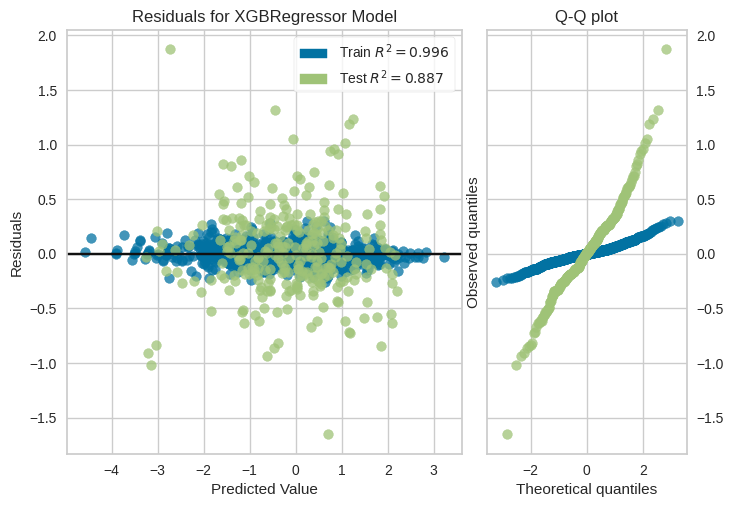

X does not have valid feature names, but StandardScaler was fitted with feature names


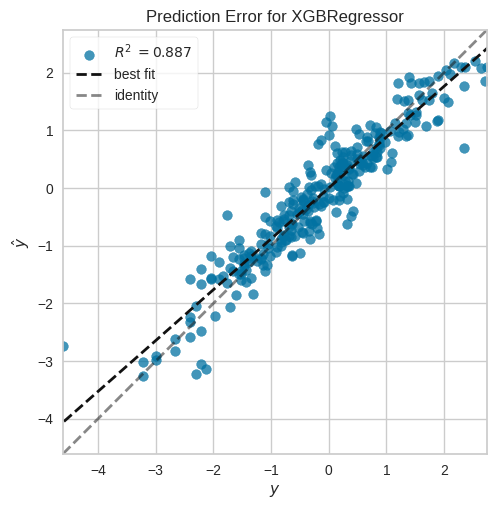

In [375]:
residuals_predictions_plot(res16, X_train, y_train, X_test, y_test)

### KNN

Fitting 5 folds for each of 192 candidates, totalling 960 fits
                           model_name  fit_time (s)  \
0                     dummy_regressor          0.00   
1                   linear_regression          0.01   
2   linear_regression_GFA_proportions          0.01   
3        linear_regression_grouped_df          0.01   
4                               ridge          0.01   
5                               lasso          0.01   
6                         elastic_net          0.01   
7                     regression_tree          0.01   
8                       random_forest          0.68   
9                                 xgb          0.39   
10                                knn          0.01   

                                          best_params refit  train_rmse  \
0                                                  {}    r2        1.21   
1                                    {'scaler': None}    r2        0.76   
2                                    {'scaler': Non

X does not have valid feature names, but StandardScaler was fitted with feature names


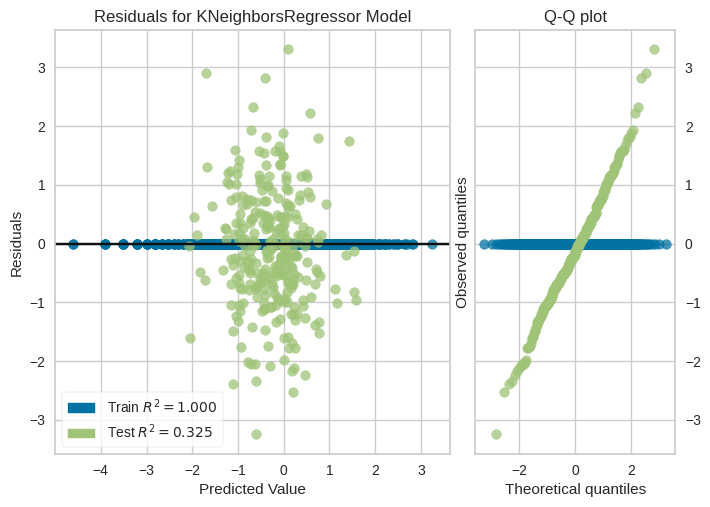

X does not have valid feature names, but StandardScaler was fitted with feature names


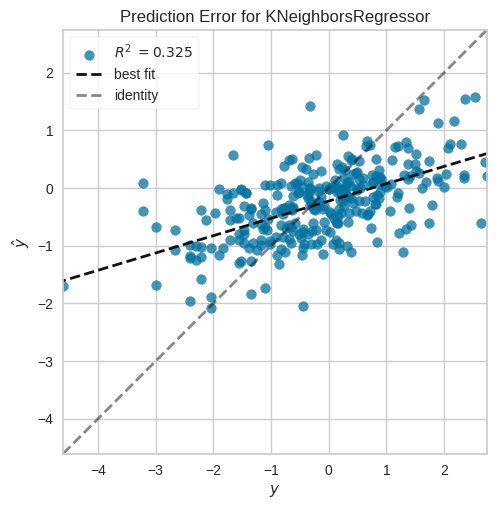

In [376]:
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid_knn = {
    'scaler': [StandardScaler(), None],
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'knn__leaf_size': [20, 30, 40]
}

res17 = process_cv('knn', pipeline_knn, param_grid_knn, refit, X_train, X_test, y_train, y_test)

print(result_df)

residuals_predictions_plot(res17, X_train, y_train, X_test, y_test)

# Feature importance

In [377]:
best_model = res16.best_estimator_.named_steps['xgb_regressor']
importances = best_model.feature_importances_

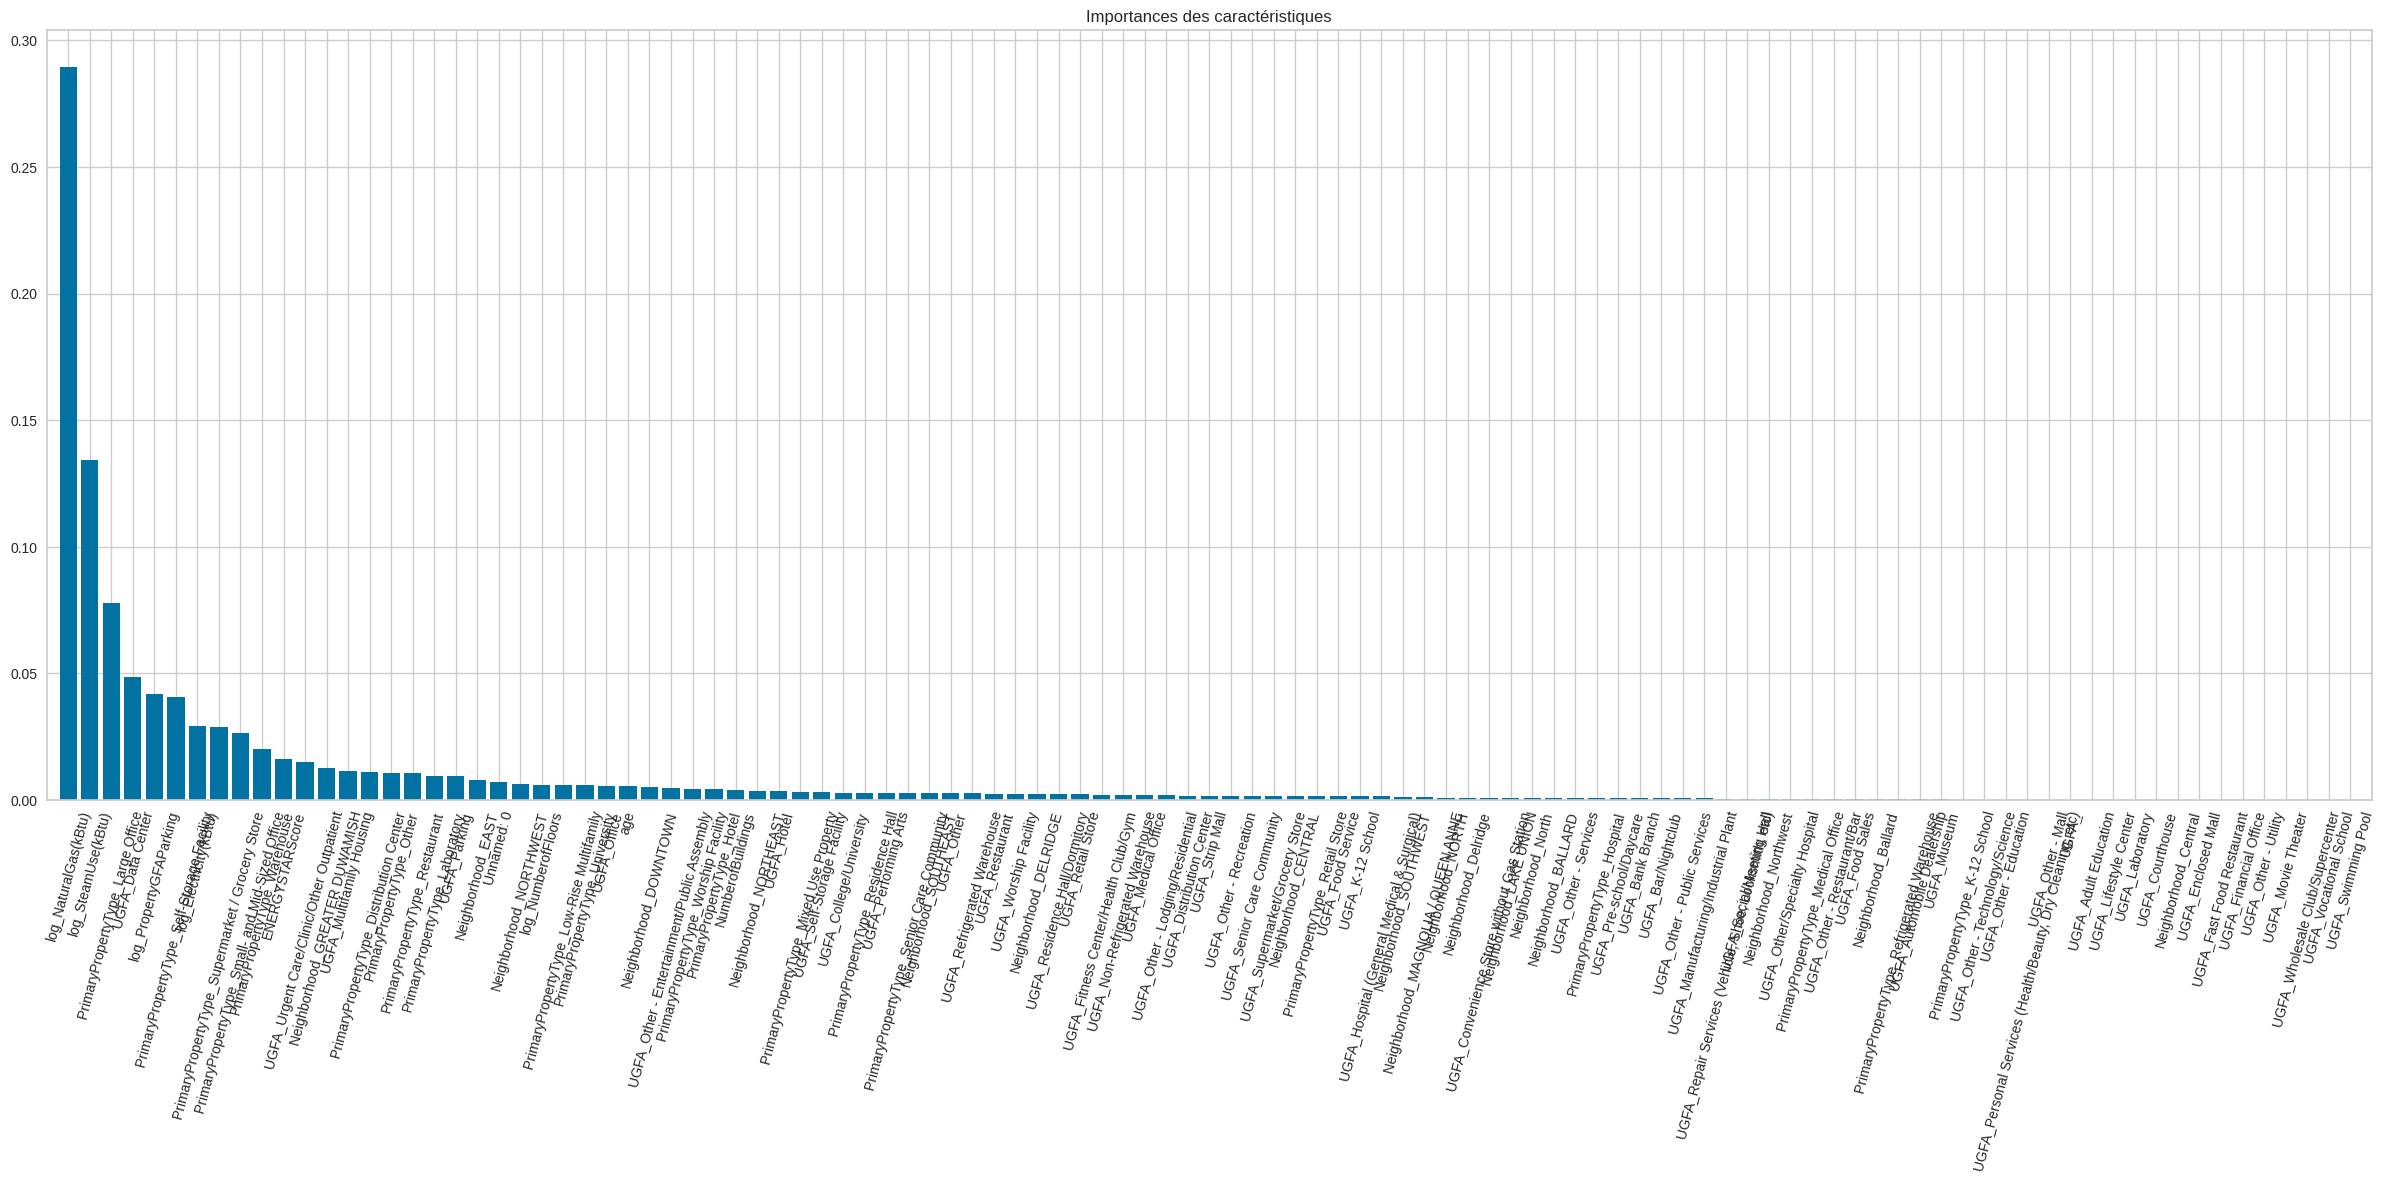

In [378]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(30,10))
plt.title("Importances des caractéristiques")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=75)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [379]:
dict_importances = {}
for indice in indices:
    dict_importances[X_train.columns[indice]] = importances[indice]

dict_importances

{'log_NaturalGas(kBtu)': 0.28959885,
 'log_SteamUse(kBtu)': 0.13431418,
 'PrimaryPropertyType_Large Office': 0.07759567,
 'UGFA_Data Center': 0.04844896,
 'log_PropertyGFAParking': 0.04202354,
 'PrimaryPropertyType_Self-Storage Facility': 0.040841304,
 'log_Electricity(kBtu)': 0.029047271,
 'PrimaryPropertyType_Supermarket / Grocery Store': 0.028705766,
 'PrimaryPropertyType_Small- and Mid-Sized Office': 0.026431823,
 'PrimaryPropertyType_Warehouse': 0.020100461,
 'ENERGYSTARScore': 0.016144432,
 'UGFA_Urgent Care/Clinic/Other Outpatient': 0.0150659885,
 'Neighborhood_GREATER DUWAMISH': 0.012751398,
 'UGFA_Multifamily Housing': 0.01137653,
 'PrimaryPropertyType_Distribution Center': 0.010926469,
 'PrimaryPropertyType_Other': 0.0108330725,
 'PrimaryPropertyType_Restaurant': 0.010746548,
 'PrimaryPropertyType_Laboratory': 0.009493223,
 'UGFA_Parking': 0.009344616,
 'Neighborhood_EAST': 0.007902551,
 'Unnamed: 0': 0.007285921,
 'Neighborhood_NORTHWEST': 0.0061185295,
 'log_NumberofFloors'

### Using LIME to explain the 6th individual prediction

In [380]:
explainer = LimeTabularExplainer(X_train.values, 
                                 feature_names=X_train.columns,
                                 mode="regression", 
                                 discretize_continuous=True)

instance = X_test.iloc[5].values.reshape(1, -1)

exp = explainer.explain_instance(instance[0], res16.predict, num_features=5)

exp.show_in_notebook(show_table=True, show_all=False)


X does not have valid feature names, but StandardScaler was fitted with feature names


The low value of "log_NaturalGas(kBtu)" and the high value of "log_Electricity(kBtu)" tend to increase the value of the prediction of "log_GHGEmissionsIntensity",
as opposed to the low values of "log_SteamUse(kBtu)", "log_PropertyGFAParking" and "log_NumberofFloors". 

<Figure size 5000x5000 with 0 Axes>

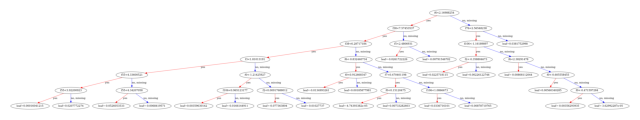

In [381]:
fig = plt.figure(figsize=(50, 50))
plot_tree(xgb_model, num_trees=50, rankdir='TB')
plt.show()

### Using SHAP

[23:55:01] WARNING: /croot/xgboost-split_1713972711803/work/cpp_src/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


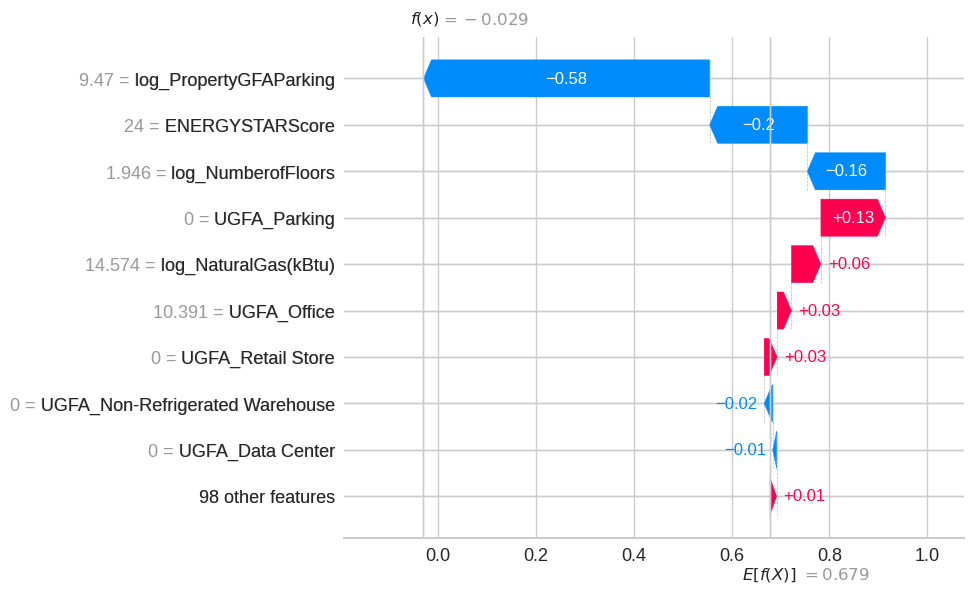

In [382]:
best_model = res16.best_estimator_
xgb_model = best_model.named_steps['xgb_regressor']

explainer = shap.Explainer(xgb_model, X_train)
instance = X_test.iloc[5:6]
shap_values = explainer(instance)
shap.plots.waterfall(shap_values[0])

[23:55:02] WARNING: /croot/xgboost-split_1713972711803/work/cpp_src/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


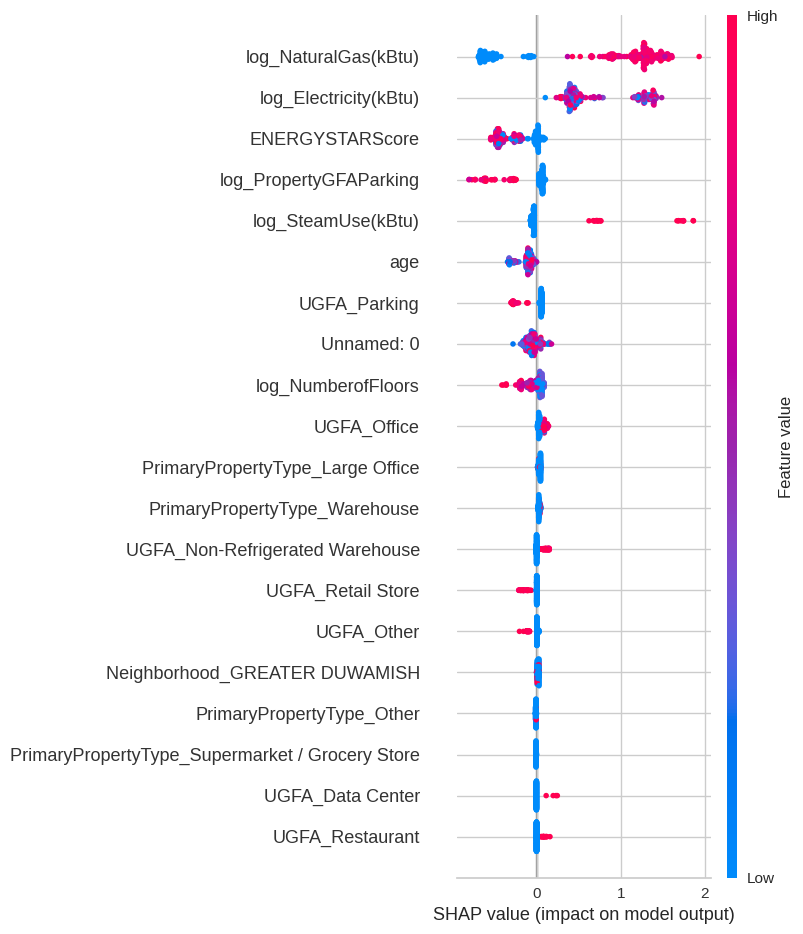

In [383]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


# ENERGYSTARScore

Training without 'ENERGYSTARScore'

In [384]:
df_without_Score = df.copy()
df_without_Score.drop("ENERGYSTARScore", axis=1, inplace=True)
X_train_without_Score, X_test_without_Score, y_train_without_Score, y_test_without_Score = init_variables(df_without_Score, 0)

In [385]:
res18 = process_cv('xgb_without_Score', pipeline_xgb, param_grid_xgb, refit, X_train_without_Score, X_test_without_Score, y_train_without_Score, y_test_without_Score)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [386]:
result_df

model_name  fit_time (s)  \
0                     dummy_regressor          0.00   
1                   linear_regression          0.01   
2   linear_regression_GFA_proportions          0.01   
3        linear_regression_grouped_df          0.01   
4                               ridge          0.01   
5                               lasso          0.01   
6                         elastic_net          0.01   
7                     regression_tree          0.01   
8                       random_forest          0.68   
9                                 xgb          0.39   
10                                knn          0.01   
11                  xgb_without_Score          0.25   

                                          best_params refit  train_rmse  \
0                                                  {}    r2        1.21   
1                                    {'scaler': None}    r2        0.76   
2                                    {'scaler': None}    r2        0.73   
3                                    {'scaler': None}    r2        0.74   
4   {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5   {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   
6   {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...    r2        0.75   
7                                    {'scaler': None}    r2        0.58   
8                        {'scaler': StandardScaler()}    r2        0.46   
9                        {'scaler': StandardScaler()}    r2        0.46   
10  {'knn__algorithm': 'ball_tree', 'knn__leaf_siz...    r2        0.98   
11                       {'scaler': StandardScaler()}    r2        0.45   

    train_mae  train_r2  test_rmse  test_mae  test_r2  
0        0.98     -0.01       1.22      0.96    -0.01  
1        0.60      0.60       0.70      0.56     0.66  
2        0.57      0.63       0.69      0.51     0.68  
3        0.58      0.62       0.68      0.53     0.68  
4        0.59      0.61       0.71      0.56     0.66  
5        0.59      0.62       0.70      0.55     0.67  
6        0.59      0.62       0.70      0.55     0.67  
7        0.43      0.77       0.59      0.45     0.76  
8        0.33      0.85       0.42      0.31     0.88  
9        0.32      0.85       0.41      0.30     0.89  
10       0.76      0.34       1.00      0.78     0.32  
11       0.34      0.86       0.45      0.33     0.86

# Prediction of the second target variable

In [387]:
X_train_second, X_test_second, y_train_second, y_test_second = init_variables(df, 1)

In [388]:
res19 = process_cv('xgb_second_target_variable', pipeline_xgb, param_grid_xgb, refit, X_train_second, X_test_second, y_train_second, y_test_second)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [389]:
result_df

model_name  fit_time (s)  \
0                     dummy_regressor          0.00   
1                   linear_regression          0.01   
2   linear_regression_GFA_proportions          0.01   
3        linear_regression_grouped_df          0.01   
4                               ridge          0.01   
5                               lasso          0.01   
6                         elastic_net          0.01   
7                     regression_tree          0.01   
8                       random_forest          0.68   
9                                 xgb          0.39   
10                                knn          0.01   
11                  xgb_without_Score          0.25   
12         xgb_second_target_variable          0.21   

                                          best_params refit  train_rmse  \
0                                                  {}    r2        1.21   
1                                    {'scaler': None}    r2        0.76   
2                                    {'scaler': None}    r2        0.73   
3                                    {'scaler': None}    r2        0.74   
4   {'ridge__alpha': 80, 'ridge__solver': 'lsqr', ...    r2        0.76   
5   {'lasso__alpha': 0.01, 'lasso__max_iter': 1000...    r2        0.75   
6   {'elasticnet__alpha': 0.01, 'elasticnet__l1_ra...    r2        0.75   
7                                    {'scaler': None}    r2        0.58   
8                        {'scaler': StandardScaler()}    r2        0.46   
9                        {'scaler': StandardScaler()}    r2        0.46   
10  {'knn__algorithm': 'ball_tree', 'knn__leaf_siz...    r2        0.98   
11                       {'scaler': StandardScaler()}    r2        0.45   
12                       {'scaler': StandardScaler()}    r2        0.44   

    train_mae  train_r2  test_rmse  test_mae  test_r2  
0        0.98     -0.01       1.22      0.96    -0.01  
1        0.60      0.60       0.70      0.56     0.66  
2        0.57      0.63       0.69      0.51     0.68  
3        0.58      0.62       0.68      0.53     0.68  
4        0.59      0.61       0.71      0.56     0.66  
5        0.59      0.62       0.70      0.55     0.67  
6        0.59      0.62       0.70      0.55     0.67  
7        0.43      0.77       0.59      0.45     0.76  
8        0.33      0.85       0.42      0.31     0.88  
9        0.32      0.85       0.41      0.30     0.89  
10       0.76      0.34       1.00      0.78     0.32  
11       0.34      0.86       0.45      0.33     0.86  
12       0.29      0.75       0.36      0.27     0.83

X does not have valid feature names, but StandardScaler was fitted with feature names


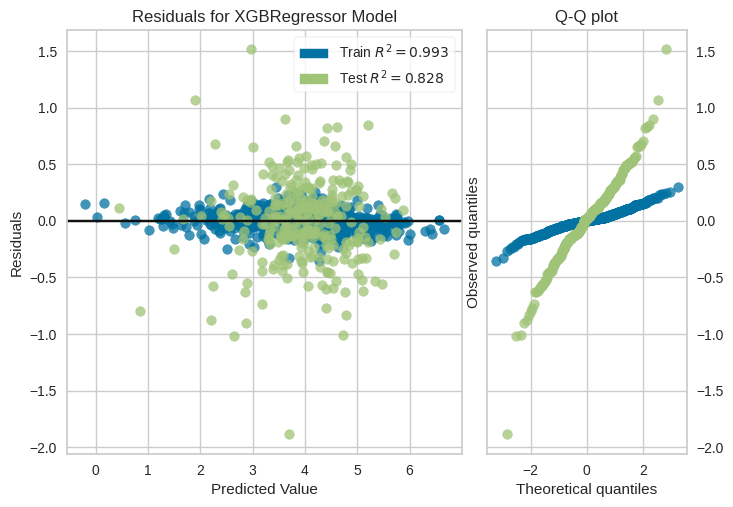

X does not have valid feature names, but StandardScaler was fitted with feature names


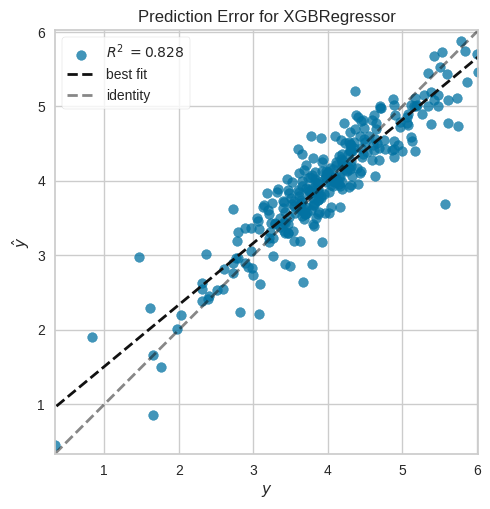

In [390]:
residuals_predictions_plot(res19, X_train_second, y_train_second, X_test_second, y_test_second)